# Import Library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Loading & Info

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Latihan Machine Learning Sendiri/Iris Classification/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


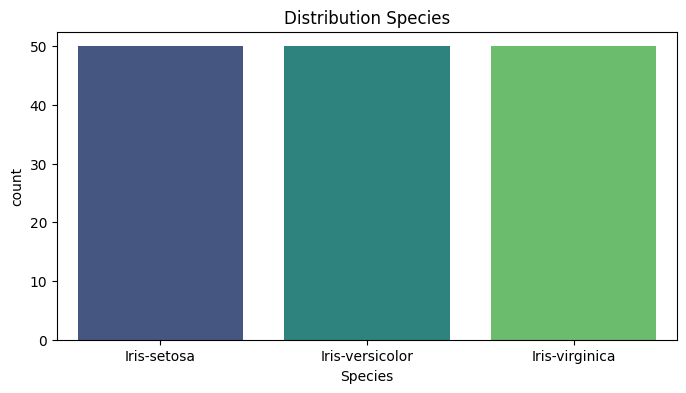

In [53]:
# Distribution Species (Target)
plt.figure(figsize=(8, 4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Distribution Species')
plt.show()

# Data Cleaning & Transformation

Check & Handling Missing Value

In [54]:
# Check Total Missing Value
print(df.isnull().sum())
print(f"Total Missing Value: {df.isna().sum().sum()}")

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Total Missing Value: 0


Check & Handling Duplicate Rows

In [55]:
# Check Total Duplicate Rows
print(f"Total Duplicate Rows: {df.duplicated().sum().sum()}")

Total Duplicate Rows: 0


Delete Unnecessary Columns

In [56]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking and Handling Outliers

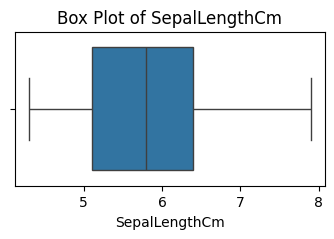

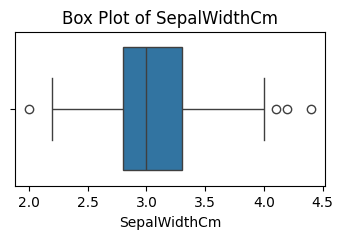

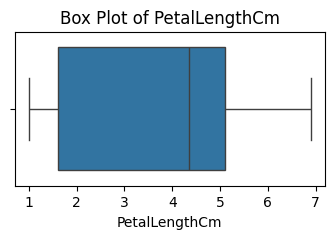

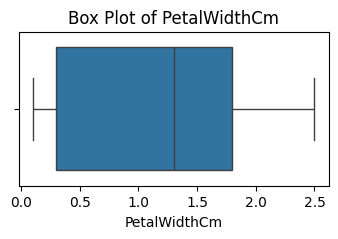

In [57]:
# Check Outliers (Before)
numeric_features = df.select_dtypes(include = ['number']).columns

for feature in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [58]:
# Handlin Outliers with Median
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
median = df['SepalWidthCm'].median()

df['SepalWidthCm'] = df['SepalWidthCm'].apply(
    lambda x: median if x < low_limit or x > up_limit else x
)

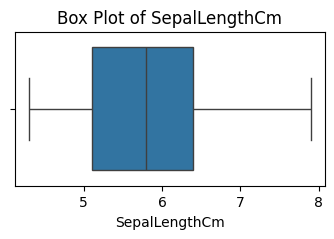

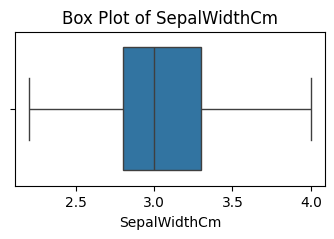

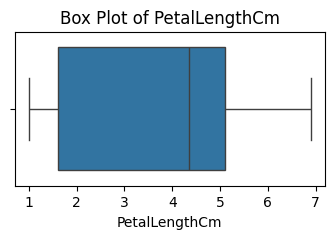

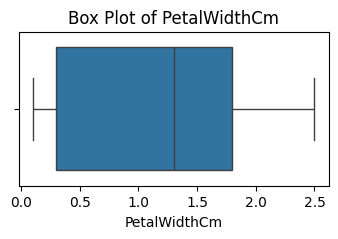

In [59]:
# Check Outliers (After)
numeric_features = df.select_dtypes(include = ['number']).columns

for feature in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Scaling & Standardization

Encoding Categorical Feature with LabelEncoder

In [60]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Scaling with StandardScaler

# Exploratory Data Analysis

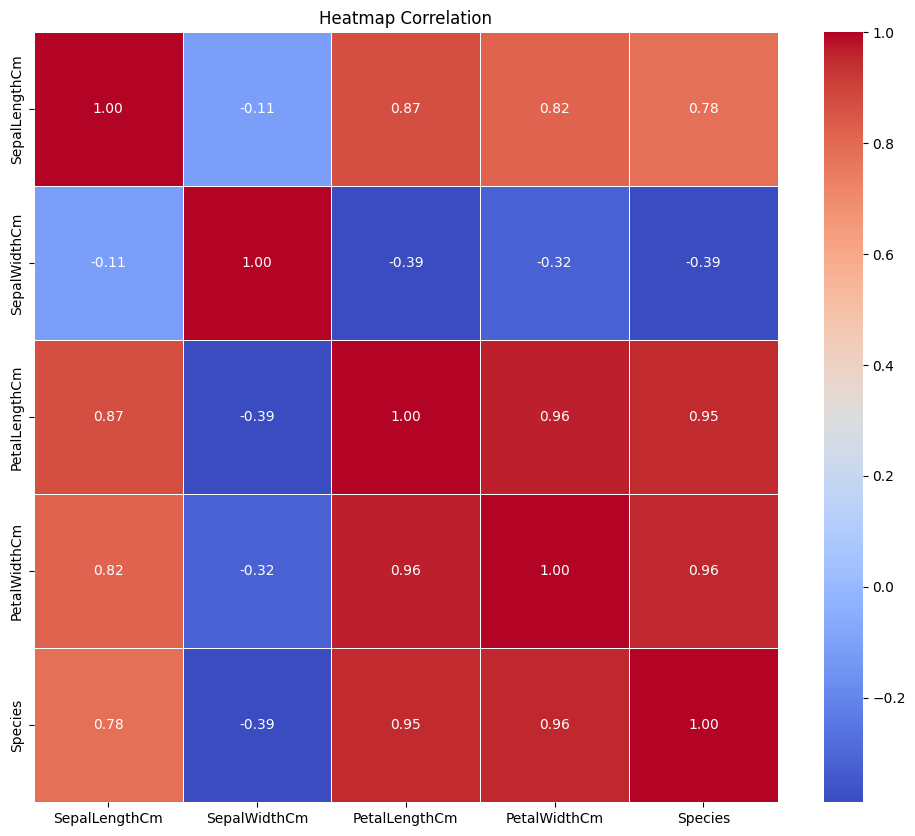

In [61]:
# Heatmap Correlation for Numeric Features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

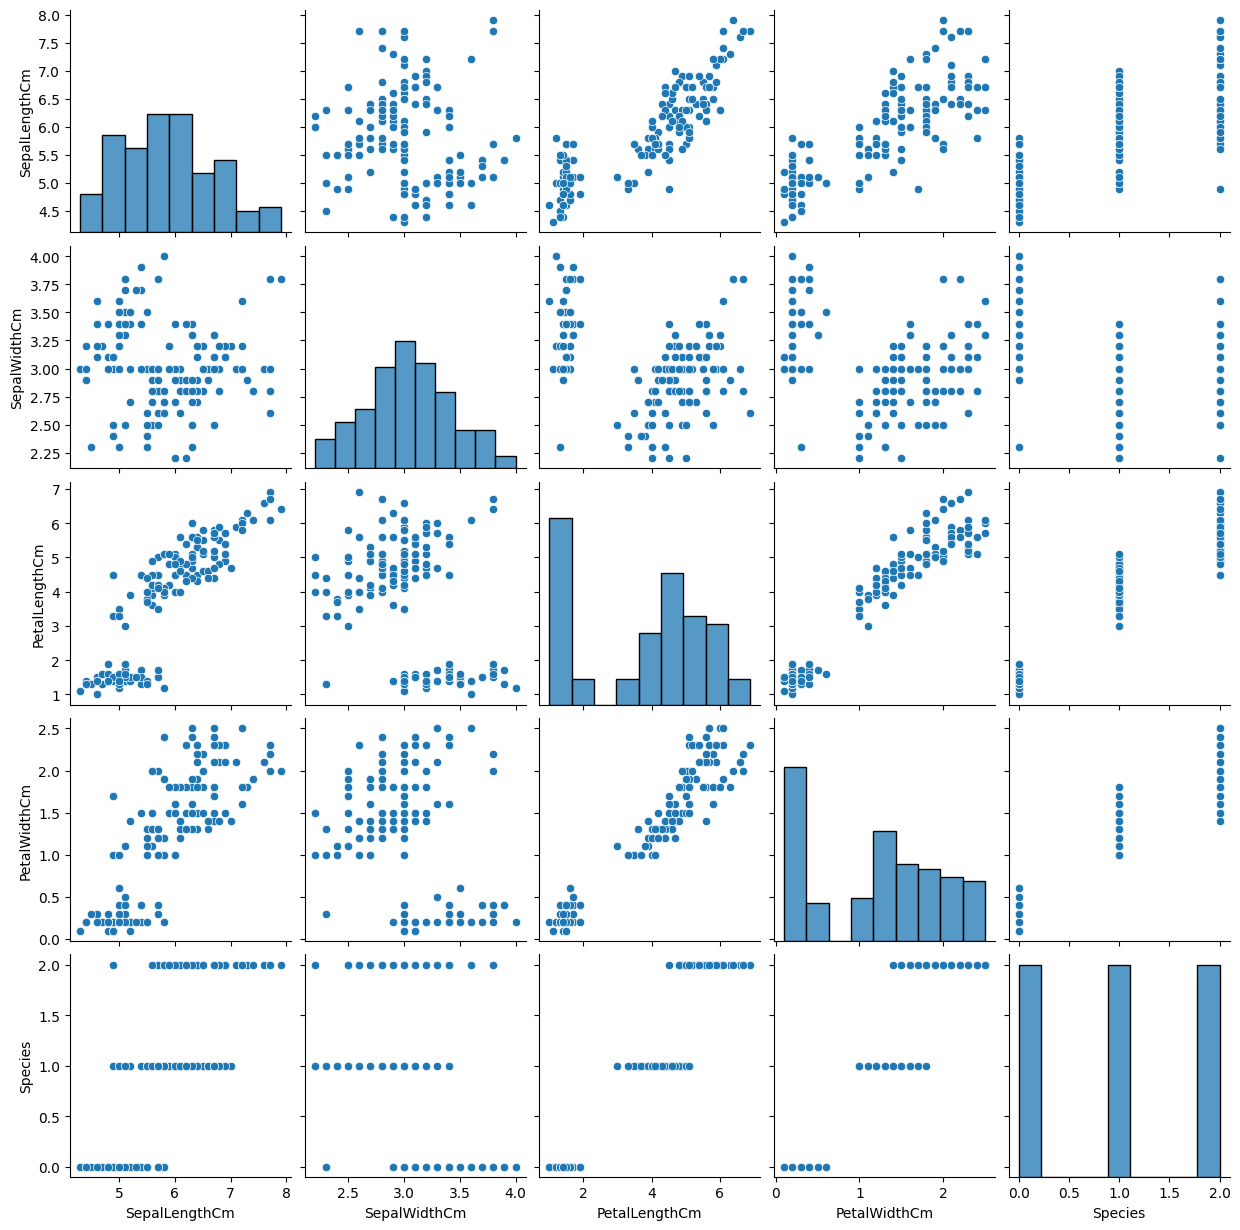

In [62]:
# Pairplot for Numeric Features
sns.pairplot(df)
plt.show()

# Data Splitting

In [63]:
X = df.drop(columns=['Species'])
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Total Data: \t",len(X))
print("Data Training: \t",len(X_train))
print("Data Testing: \t",len(X_test))

Total Data: 	 150
Data Training: 	 120
Data Testing: 	 30


# Model Training & Evaluation

Model Training

In [64]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Model Evaluation

In [65]:
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Naive Bayes": nb
}

results = []

for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Report (Precision, Recall, F1)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Saving Result
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Accuracy", ascending=False))

           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  1.000000   1.000000  1.000000  1.000000
1  Decision Tree  0.966667   0.971429  0.966667  0.967282
2  Random Forest  0.966667   0.971429  0.966667  0.967282
3            SVM  0.966667   0.971429  0.966667  0.967282
4    Naive Bayes  0.966667   0.971429  0.966667  0.967282


# Saving Model

In [66]:
# Invers Categorical Feature
df['Species'] = label_encoder.inverse_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
joblib.dump((knn, label_encoder), 'iris_model.pkl')

['iris_model.pkl']